In [53]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import download_plotlyjs, iplot, plot, init_notebook_mode
import cufflinks as cf
%matplotlib inline

In [54]:
df = pd.read_csv('C:\\Users\\m1568006\\Desktop\\Test_venv\\.venv\\results.csv')

In [55]:
df.head()

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


In [56]:
df.describe()
df.drop(df.columns[0], inplace=True, axis=1)

In [57]:
scaler = StandardScaler()

In [58]:
df_temp = scaler.fit_transform(df.drop(['Div'], axis=1))

In [59]:
df_temp = pd.DataFrame(df_temp, columns=df.columns[:-1])

<Axes: xlabel='Total', ylabel='Results'>

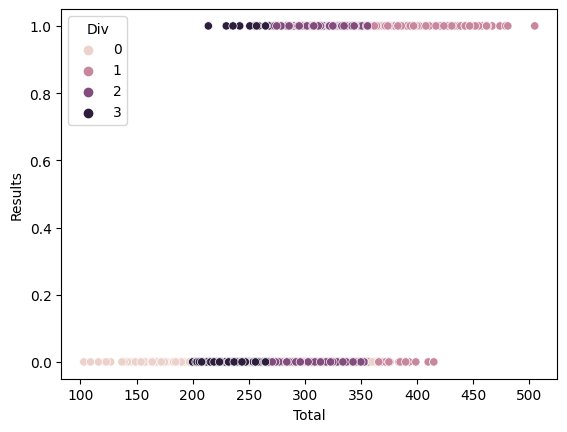

In [60]:
sns.scatterplot(data=df, x="Total", y="Results", hue=df["Div"])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_temp, df["Div"], test_size=0.33)

In [62]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [63]:
error_rate

[0.23636363636363636,
 0.23939393939393938,
 0.23939393939393938,
 0.21818181818181817,
 0.20606060606060606,
 0.20909090909090908,
 0.18787878787878787,
 0.19393939393939394,
 0.20303030303030303,
 0.20606060606060606,
 0.21212121212121213,
 0.16666666666666666,
 0.19393939393939394,
 0.18484848484848485,
 0.19696969696969696,
 0.17575757575757575,
 0.18484848484848485,
 0.18181818181818182,
 0.19393939393939394,
 0.19090909090909092,
 0.20606060606060606,
 0.20606060606060606,
 0.21212121212121213,
 0.20909090909090908,
 0.2,
 0.20303030303030303,
 0.20606060606060606,
 0.20303030303030303,
 0.20303030303030303,
 0.20606060606060606,
 0.20909090909090908,
 0.20606060606060606,
 0.21818181818181817,
 0.20303030303030303,
 0.20606060606060606,
 0.20909090909090908,
 0.21212121212121213,
 0.21212121212121213,
 0.20909090909090908,
 0.20606060606060606,
 0.20909090909090908,
 0.20606060606060606,
 0.21818181818181817,
 0.21212121212121213,
 0.21818181818181817,
 0.21818181818181817,
 0.2

In [64]:
init_notebook_mode(connected=True)
cf.go_offline()

In [105]:
error_rate = np.array(error_rate)
final = np.vstack((error_rate, np.linspace(0, 98, 99)))
df_plot = pd.DataFrame()
final = final.T

In [106]:
df_iplot = pd.DataFrame(final, columns=["Error", "Index"])
df_iplot

,Error,Index
0,0.236364,0.0
1,0.239394,1.0
2,0.239394,2.0
3,0.218182,3.0
4,0.206061,4.0
...,...,...
94,0.251515,94.0
95,0.251515,95.0
96,0.251515,96.0
97,0.254545,97.0


In [112]:
df_iplot.iplot(kind='line', x='Index', y='Error', colors='blue') # type: ignore

In [108]:
final

array([[ 0.23636364,  0.        ],
       [ 0.23939394,  1.        ],
       [ 0.23939394,  2.        ],
       [ 0.21818182,  3.        ],
       [ 0.20606061,  4.        ],
       [ 0.20909091,  5.        ],
       [ 0.18787879,  6.        ],
       [ 0.19393939,  7.        ],
       [ 0.2030303 ,  8.        ],
       [ 0.20606061,  9.        ],
       [ 0.21212121, 10.        ],
       [ 0.16666667, 11.        ],
       [ 0.19393939, 12.        ],
       [ 0.18484848, 13.        ],
       [ 0.1969697 , 14.        ],
       [ 0.17575758, 15.        ],
       [ 0.18484848, 16.        ],
       [ 0.18181818, 17.        ],
       [ 0.19393939, 18.        ],
       [ 0.19090909, 19.        ],
       [ 0.20606061, 20.        ],
       [ 0.20606061, 21.        ],
       [ 0.21212121, 22.        ],
       [ 0.20909091, 23.        ],
       [ 0.2       , 24.        ],
       [ 0.2030303 , 25.        ],
       [ 0.20606061, 26.        ],
       [ 0.2030303 , 27.        ],
       [ 0.2030303 ,

In [109]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [111]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 18   0   2  14]
 [  0  56  17   0]
 [  0   0 120  12]
 [  2   0  23  66]]
              precision    recall  f1-score   support

           0       0.90      0.53      0.67        34
           1       1.00      0.77      0.87        73
           2       0.74      0.91      0.82       132
           3       0.72      0.73      0.72        91

    accuracy                           0.79       330
   macro avg       0.84      0.73      0.77       330
weighted avg       0.81      0.79      0.79       330

